In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pickle
from datetime import date

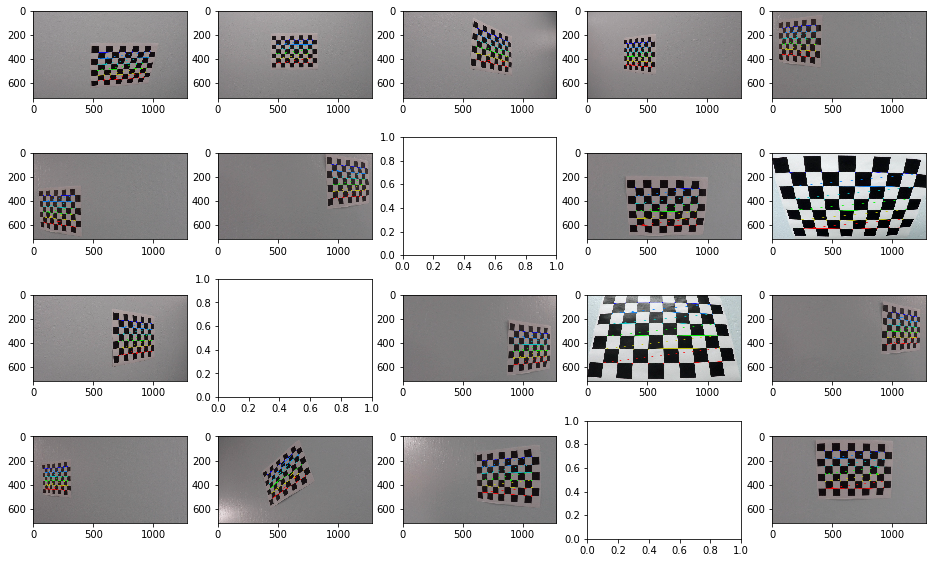

In [30]:
'''
This function calculates corners of the chessboard

Input: 
nx: the number of inside corners in x axis
ny: the number of inside corners in y axis

Output:
objpoints: Object points in 3D space
imgpoints: Image points in 2D space (aka Corners in the image)
'''
def calculate_chessboard_corners(nx, ny):
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    objpoints = []
    imgpoints = []

    input_dir = 'camera_cal/'
    output_dir= 'camera_cal_output/'
    f, ax = plt.subplots(4, 5, figsize=(16,10))
    ax = ax.ravel()
    for idx, fname in enumerate(os.listdir(input_dir)):

        img = cv2.imread(input_dir+fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        if ret == True:
            objpoints+=[objp]
            imgpoints+=[corners]
            # Draw and display the corners
            cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            ax[idx].imshow(img)
    plt.show()
    
    return objpoints, imgpoints
    

objpoints, imgpoints = calculate_chessboard_corners(9, 6)

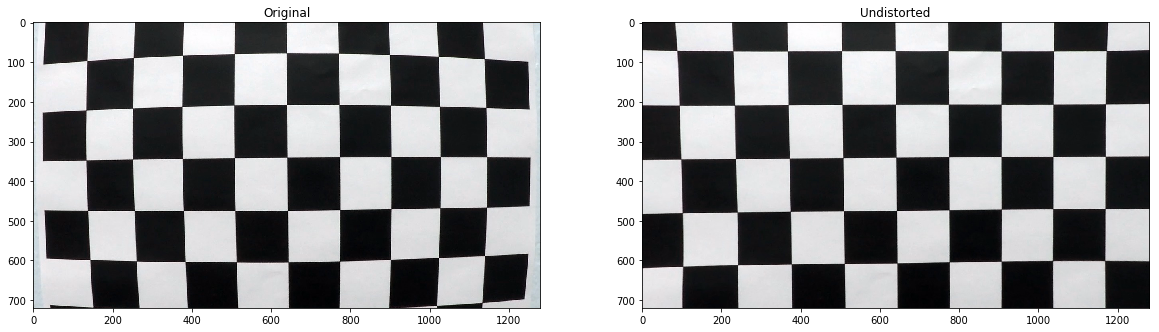

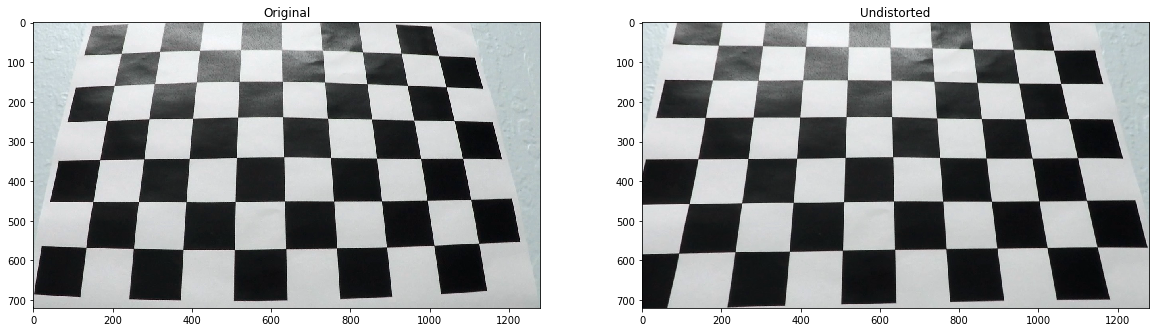

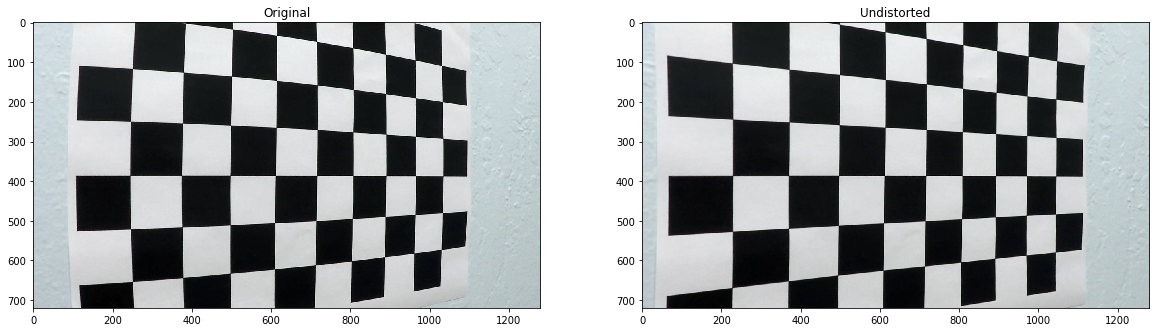

In [36]:
'''
This function undistorts a given image

User has the option of displaying the image and saving the model as well

'''
def undistort(file_name, display=True, save=True):
    
    img = cv2.imread(file_name)
    img_size = (img.shape[1], img.shape[0])

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)                 
                     
    if display:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
        ax1.imshow(img)
        ax1.set_title('Original')
        ax2.imshow(dst)
        ax2.set_title('Undistorted')
        plt.show()
    if save:
        dt = date.today()
        pickle.dump( {"mtx": mtx, "dist": dist}, open( 'camera_matrix_model_%s_%s_%s.pkl' % (dt.month, dt.day, dt.year), "wb" ) )

undistort('./camera_cal/calibration1.jpg')
undistort('./camera_cal/calibration3.jpg')
undistort('./camera_cal/calibration5.jpg')